**Downloading Dataset**

In [115]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


# Importing the dataset and exploring basic info

In [116]:
import pandas as pd

data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
print("Shape of dataset")
original_shape = data.shape
data.shape

Shape of dataset


(891, 12)

In [118]:
print("NaN Values")
data.isnull().sum()

NaN Values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [119]:
print("Table for NaN dataset")
data.isnull()

Table for NaN dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [120]:
data_null= data[data.isnull().any(axis=1)]
data_null.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [121]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# Handling NaN Values

In [122]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [124]:
#Replacing Non-numerical NaN (object - datatype) values with 'unknown'
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = data[col].fillna("Unknown")


In [125]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Encoding

In [126]:
# Extracting titles from names
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Mr
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Unknown,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Unknown,C,Mrs


In [127]:
# Dropping the Name, Ticket, PassengerId and Cabin column (it’s unlikely to add value)
data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


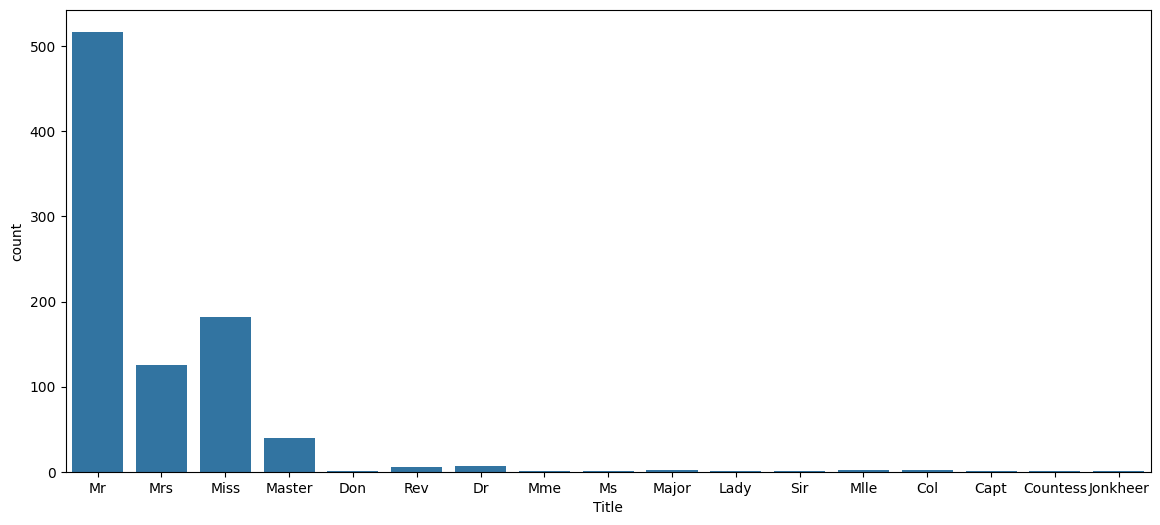

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.countplot(x='Title', data=data)
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

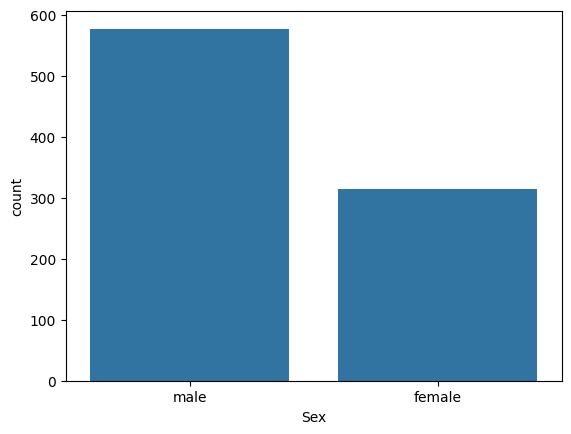

In [129]:
sns.countplot(x='Sex', data=data)

In [130]:
data['Sex'].value_counts()


,count
Sex,
male,577
female,314


In [131]:
data['Title'].value_counts()


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [132]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77
Unknown,2


In [133]:
data['Title'] = data['Title'].replace({
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Col': 'Rare',
    'Don': 'Rare',
    'Dr': 'Rare',
    'Major': 'Rare',
    'Rev': 'Rare',
    'Sir': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare'
})

data = data[data['Embarked'] != 'Unknown']

print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [134]:
from sklearn.preprocessing import LabelEncoder


data= data.replace({'Sex': {'male': 0, 'female': 1}})
data = pd.get_dummies(data, columns=['Title'], drop_first=True)
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data= data.astype(int)

data.head()


<ipython-input-134-2adb411904d7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace({'Sex': {'male': 0, 'female': 1}})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0,3,0,22,1,0,7,0,1,0,0,0,1
1,1,1,1,38,1,0,71,0,0,1,0,0,0
2,1,3,1,26,0,0,7,1,0,0,0,0,1
3,1,1,1,35,1,0,53,0,0,1,0,0,1
4,0,3,0,35,0,0,8,0,1,0,0,0,1


# Normalisation

In [135]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data[numerical_cols].head())


   Survived  Pclass  Sex     Age  SibSp  Parch      Fare  Title_Miss  \
0       0.0     1.0  0.0  0.2750  0.125    0.0  0.013672         0.0   
1       1.0     0.0  1.0  0.4750  0.125    0.0  0.138672         0.0   
2       1.0     1.0  1.0  0.3250  0.000    0.0  0.013672         1.0   
3       1.0     0.0  1.0  0.4375  0.125    0.0  0.103516         0.0   
4       0.0     1.0  0.0  0.4375  0.000    0.0  0.015625         0.0   

   Title_Mr  Title_Mrs  Title_Rare  Embarked_Q  Embarked_S  
0       1.0        0.0         0.0         0.0         1.0  
1       0.0        1.0         0.0         0.0         0.0  
2       0.0        0.0         0.0         0.0         1.0  
3       0.0        1.0         0.0         0.0         1.0  
4       1.0        0.0         0.0         0.0         1.0  


# Handling Outliers

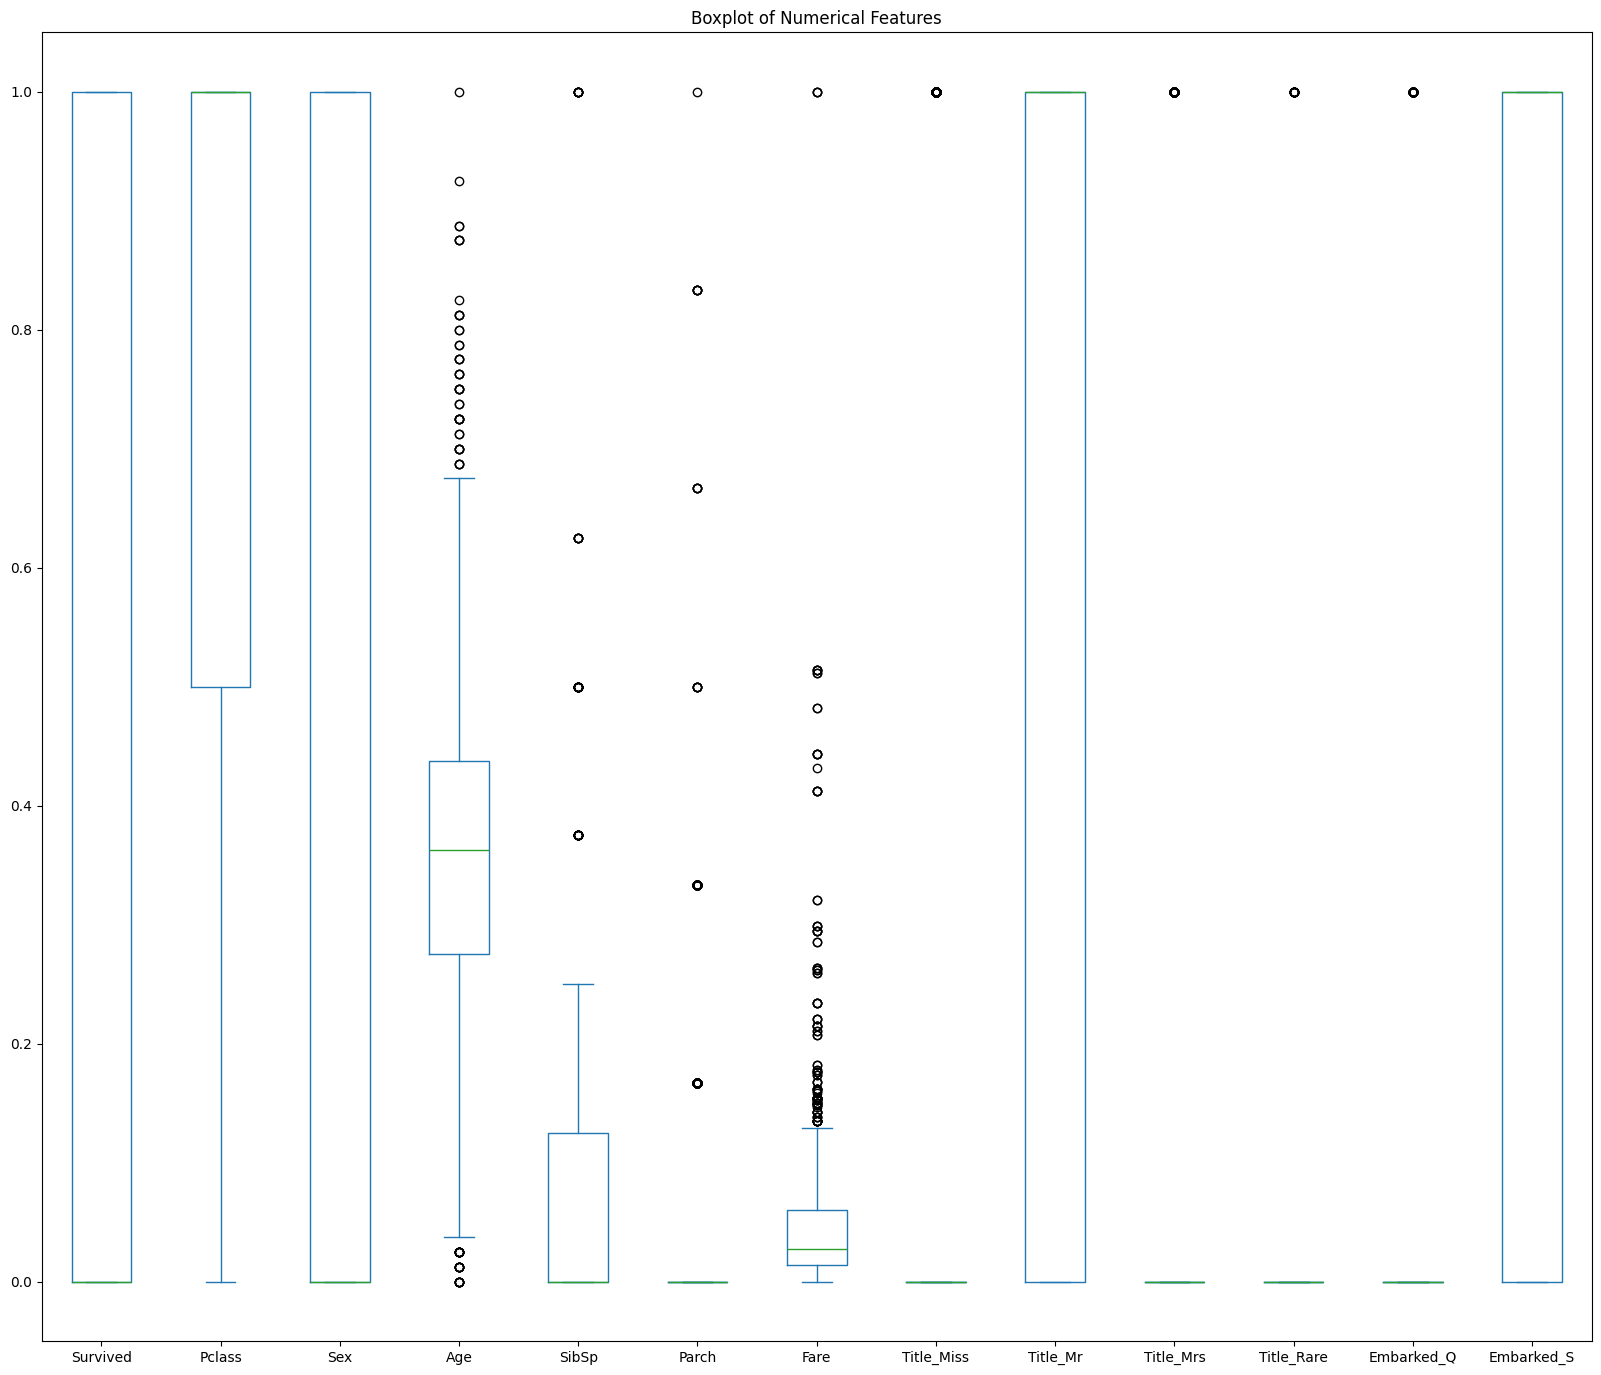

In [136]:
data[numerical_cols].plot(kind='box', figsize=(20, 17))
plt.title("Boxplot of Numerical Features")
plt.show()


In [137]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    data = remove_outliers(data, col)


print(f'New dataset shape: {data.shape}')


New dataset shape: (325, 13)


In [138]:
rows_removed = len(data) - original_shape[0]
print(f'Number of rows removed: {rows_removed}')

Number of rows removed: -566


In [139]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.2750,0.125,0.0,0.013672,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.4375,0.000,0.0,0.015625,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.6750,0.000,0.0,0.099609,0.0,1.0,0.0,0.0,0.0,1.0
12,0.0,1.0,0.0,0.2500,0.000,0.0,0.015625,0.0,1.0,0.0,0.0,0.0,1.0
17,1.0,0.5,0.0,0.3625,0.000,0.0,0.025391,0.0,1.0,0.0,0.0,0.0,1.0
